<span style="color:red">  This notebook has some partially worked out example solutions -- BR </span>

# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Assignment 1

## Due Thursday February 8, 2018

- Make a copy of this notebook file so you can add your answers in additional cells.
- Complete all the problems below. 
- For the questions that require calculation, show your code.
- Include comments in your code to explain your method as necessary.
- Submit your solutions in a single Jupyter notebook that contains your text, your code, and your figures.
- *Try to make sure that your notebook runs cleanly without errors:*
    - Save your notebook
    - From the `Kernel` menu, select `Restart & Run All`
    - Did the notebook run from start to finish without error and produce the expected output?
    - If yes, save again and submit your notebook file
    - If no, fix the errors and try again.
- Save your notebook as `[your last name].ipynb`, e.g. my notebook should be called `Rose.ipynb`.  *This makes it easier for me when I collect all your answers*
- Submit your answers by email before class on **Thursday February 8 2018**.

## Primer section 1.6, Review question 1

List the five reasons most persuasive, in your opinion, for building or using models. You do not need to restrict your list to climate modeling but, for each of your chosen reasons, give an example of how a model has contributed already and could help in the future.


## Question 2: version control with `git`

In this course we will make use of the very popular version control system called `git`. Version control means keeping track of changes to files, most often files of source code. Learning to use `git` now will simplify your workflow in the future, and help you emphasize reproducibility of your scientific computing.

There are many resources online for learning `git`. If you have never used `git` before, take yourself through this tutorial:

https://www.codeschool.com/courses/try-git

It is free but will require you to register for an account on Code School.

I also suggest reading through the *Getting Started* section here:
https://backlog.com/git-tutorial/

You will also want to make sure that `git` is installed on your own laptop. If you are using Mac or Linux it is probably already there. (Just try typing `git` in a terminal and see what happens). Windows users may need to install if [from here](https://git-scm.com/downloads). *You will need this installed later, but it is not necessary to complete this homework assignment*.

Once you have completed the tutorial and reading, answer these question in your own words:

1. What was something your found surprising or especially interesting from the tutorial?
2. Why do you think it is important to use version control when writing computer code? 
3. Can you think of a situation in your past experience where version control with `git` might have been helpful?

## Question 3: Time-dependent warming in the zero-dimensional Energy Balance Model

In lecture we defined a zero-dimensional energy balance model for the global mean surface temperature $T_s$ as follows

$$ C  \frac{dT_s}{dt} = \text{ASR} - \text{OLR}$$

$$ \text{ASR} = (1-\alpha) Q $$

$$ \text{OLR} = \tau \sigma T_s^4$$

where we defined these terms:

- $C$ is a heat capacity for the atmosphere-ocean column
- $\alpha$ is the global mean planetary albedo
- $\sigma = 5.67 \times 10^{-8}$ W m$^{-2}$ K$^{-4}$ is the Stefan-Boltzmann constant
- $\tau$ is our transmissivity parameter for the atmosphere.
- $Q$ is the global-mean incoming solar radiation, or *insolation*.

Refer back to our class notes for parameter values.

1. If the heat penetrated to twice as deep into the ocean, the value of $C$ would be twice as large. Would this affect the **equilibrium temperature**? Why or why not?
2. In class we used numerical timestepping to investigate a *hypothetical climate change scenario* in which $\tau$ decreases to 0.57 and $\alpha$ increases to 0.32. We produced a graph of $T_s(t)$ over a twenty year period, starting from an initial temperature of 288 K. Here you will repeat this calculate with a larger value of $C$ and compare the warming rates. Specifically:
    - Repeat our in-class time-stepping calculation with the same parameters we used before (including a heat capacity of $C = 4\times10^8$ J m$^{-2}$ K$^{-1}$), but extend it to 50 years. **You should create an array of temperatures with 51 elements, beginning from 288 K**.
    - Now do it again, but use $C = 8\times10^8$ J m$^{-2}$ K$^{-1}$ (representing 200 meters of water). You should **create another 51-element array** of temperatures also beginning from 288 K.
    - **Make a well-labeled graph** that compares the two temperatures over the 50-year period.
    
4. What do your results show about the role of heat capacity on climate change? Give a short written answer.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Closely following code we developed in Lecture 2

def ASR(alpha,Q):
    return (1-alpha)*Q

def OLR(tau,T):
    sigma = 5.67E-8
    return tau*sigma*T**4

dt = 60. * 60. * 24. * 365.   # one year expressed in seconds

c_w = 4E3  #  Specific heat of water in J/kg/K
rho_w = 1E3  #  Density of water in kg/m3
H = 100.   #  Depth of water in m
C1 = c_w * rho_w * H   #  Heat capacity for 100 m of water
C2 = C1 * 2. # heat capacity for 200 m of water

In [4]:
# Allow the user to specify a heat capacity as input argument
def step_forward(T, alpha=0.32, tau=0.57, C=C1, Q=341.3):
    return T + dt / C * ( ASR(alpha,Q) - OLR(tau,T) )

In [5]:
#  Step forward 50 years, calculate temperature, and store the result
#   Do the same thing for the two different heat capacities
numsteps = 50
Tsteps_C1 = np.zeros(numsteps+1)
Tsteps_C2 = np.zeros(numsteps+1)
Years = np.zeros(numsteps+1)
Tsteps_C1[0] = 288. 
Tsteps_C2[0] = 288.
for n in range(numsteps):
    Years[n+1] = n+1
    Tsteps_C1[n+1] = step_forward( Tsteps_C1[n], C=C1 )
    Tsteps_C2[n+1] = step_forward( Tsteps_C2[n], C=C2 )

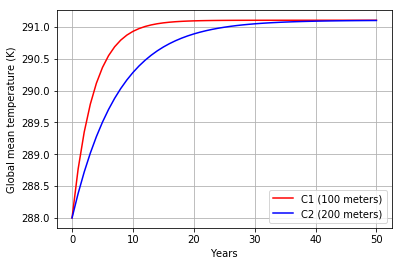

In [6]:
plt.plot(Years, Tsteps_C1, color='red', label='C1 (100 meters)')
plt.plot(Years, Tsteps_C2, color='blue', label='C2 (200 meters)')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.legend()
plt.grid()

## Question 4: Albedo feedback in the Energy Balance Model

For this exercise, we will introduce a new physical process into our model by **letting the planetary albedo depend on temperature**. The idea is that a warmer planet has less ice and snow at the surface, and thus a lower planetary albedo.

Represent the ice-albedo feedback through the following formula:

$$ \alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i &   & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &   & T_i < T < T_o \\
\alpha_o &   & T \ge T_o \end{array} \right\}$$

with the following parameter values:

- $\alpha_o = 0.289$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.7$ is the albedo of a very cold, completely ice-covered planet
- $T_o = 293$ K is the threshold temperature above which our model assumes the planet is ice-free
- $T_i = 260$ K is the threshold temperature below which our model assumes the planet is completely ice covered. 

For intermediate temperature, this formula gives a smooth variation in albedo with global mean temperature. It is tuned to reproduce the observed albedo $\alpha = 0.299$ for $T = 288$ K. 

1. 
    - Define a Python function that implements the above albedo formula. *There is definitely more than one way to do it. It doesn't matter how you do it as long as it works!*
    -  Use your function to calculate albedos for a wide range on planetary temperature (e.g. from $T=250$ K to $T=300$ K.)
    - Present your results (albedo as a function of global mean temperature, or $\alpha(T)$) in a nicely labeled graph.
    
2. Now investigate a climate change scenario with this new model:
    - Suppose that the transmissivity decreases from 0.611 to 0.57 (same as before)
    - Your task is to **calculate the new equilibrium temperature**. First, explain very briefly why you can't just solve for it analytically as we did when albedo was a fixed number.
    - Instead, you will use numerical time-stepping to find the equilibrium temperature
    - Repeat the procedure from Question 3 *(time-step forward for 50 years from an initial temperature of 288 K and make a graph of the results)*, but this time **use the function you defined above to compute the albedo for the current temperature**.
    - Is the **new equilibrium temperature larger or smaller** than it was in the model with fixed albedo? Explain why very briefly.

In [7]:
#  One way to implement the decision-making: using if / elif / else

def intermediate_albedo(T, ao=0.289, ai=0.7, To=293., Ti=260.):
    return ao + (ai-ao)*(T-To)**2/(Ti-To)**2

def albedo(T, ao=0.289, ai=0.7, To=293., Ti=260.):
    '''Given a single input temperature in Kelvin, return a single albedo'''
    if T <= Ti:
        return ai
    elif Ti<T<To:
        return intermediate_albedo(T,ao,ai,To,Ti)
    elif T >= To:
        return ao
    else:
        print('There is something wrong with the input')

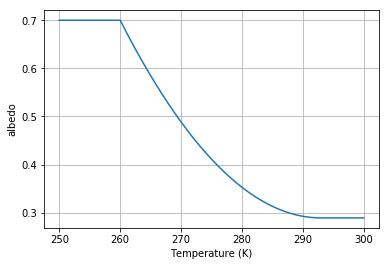

In [8]:
num_points = 1000
Tarray = np.linspace(250, 300, num_points)
alpha = np.zeros_like(Tarray)
for n in range(num_points):
    alpha[n] = albedo(Tarray[n])
    
plt.plot(Tarray, alpha)
plt.xlabel('Temperature (K)')
plt.ylabel('albedo')
plt.grid()

In [12]:
albedo(Tarray)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

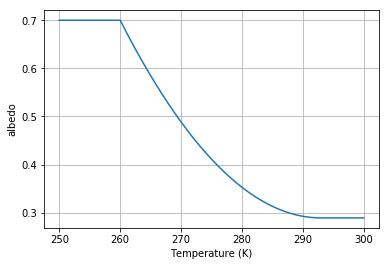

In [13]:
# A vectorized version using numpy.where (look it up!)

def albedo_vectorized(T, ao=0.289, ai=0.7, To=293., Ti=260.):
    alpha1 = np.where(T<To, intermediate_albedo(T,ao,ai,To,Ti), ao)
    alpha2 = np.where(T<=Ti, ai, alpha1)
    return alpha2

plt.plot(Tarray, albedo_vectorized(Tarray))
plt.xlabel('Temperature (K)')
plt.ylabel('albedo')
plt.grid()

In [14]:
#  Step forward 50 years, calculate temperature, and store the result
#   update the albedo at each timestep
numsteps = 50
Tsteps_varalpha = np.zeros(numsteps+1)
Tsteps_varalpha[0] = 288. 
for n in range(numsteps):
    alpha = albedo(Tsteps_varalpha[n])
    Tsteps_varalpha[n+1] = step_forward( Tsteps_varalpha[n], C=C1, alpha=alpha )

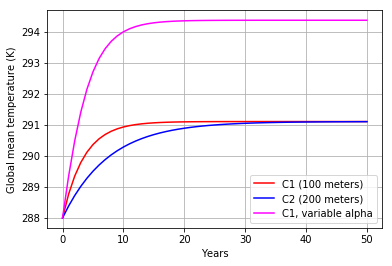

In [16]:
plt.plot(Years, Tsteps_C1, color='red', label='C1 (100 meters)')
plt.plot(Years, Tsteps_C2, color='blue', label='C2 (200 meters)')
plt.plot(Years, Tsteps_varalpha, color='magenta', label='C1, variable alpha')
plt.xlabel('Years')
plt.ylabel('Global mean temperature (K)');
plt.legend()
plt.grid()

## Bonus problem

*Open-ended investigation for extra credit, not required*

Something very different occurs in this model if you introduce a strong negative radiative forcing, either by substantially reducing greenhouse gases (which we would represent as an increase in the transmissivity $\tau$), or by decreasing the incoming solar radiation $Q$.

Investigate, using your numerical model code, and report your results along with your thoughts.